In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_csv(r"../Data/GPS/2023/CSV/947_cl_R.csv")
df = df.sort_values(by='No')
df = df.reset_index(drop=True)
df.tail()

,GMT_Time,Latitude,Longitude,Altitude,Duration,Temperatur,DOP,Satellites,Cause_of_F,Lab_Coord,...,Lab_Sat,Lab_Alt,No,time,distance,dt,speed,NEAR_FID,NEAR_DIST,RASTERVALU
2861,2023-10-19 18:30:00,35.663424,-109.053080,2074.44,4.0,26.0,2.0,4.0,GPS Schedule,0.0,...,0.0,0.0,2963.0,2023-10-19 12:30:00,1361.168722,10.0,79.077159,NaN,NaN,0.212778
2862,2023-10-19 18:40:00,35.675841,-109.057266,2063.16,58.0,27.5,1.4,5.0,GPS Schedule,0.0,...,0.0,0.0,2964.0,2023-10-19 12:40:00,1428.826835,10.0,139.499778,NaN,NaN,0.215619
2863,2023-10-19 18:50:00,35.675833,-109.057321,2071.19,16.0,26.0,1.4,6.0,GPS Schedule,0.0,...,0.0,0.0,2965.0,2023-10-19 12:50:00,5.048185,10.0,71.693751,NaN,NaN,0.215619
2864,2023-10-19 19:00:00,35.675469,-109.056744,2043.44,2.0,25.0,4.2,5.0,GPS Schedule,0.0,...,0.0,0.0,2966.0,2023-10-19 13:00:00,65.977164,10.0,3.551267,NaN,NaN,0.214957
2865,2023-10-19 20:00:00,35.675653,-109.057313,2063.05,6.0,27.0,3.6,5.0,GPS Schedule,0.0,...,0.0,0.0,2967.0,2023-10-19 14:00:00,55.371900,60.0,1.733558,NaN,NaN,0.215572


In [16]:
# act_df_1 = pd.read_csv(r"../Data/ACC/2022/1101/1101_Act1.csv")
# act_df_2 = pd.read_csv(r"../Data/ACC/2022/1101/1101_Act2.csv")
# act_df_3 = pd.read_csv(r"../Data/ACC/2022/1101/1101_Act3.csv")
# act_df_4 = pd.read_csv(r"../Data/ACC/2022/1101/1101_Act4.csv")
# # act_df_5 = pd.read_csv(r"../Data/ACC/2022/939/939_Act5.csv")
# # act_df_6 = pd.read_csv(r"../Data/ACC/2022/939/939_Act6.csv")
# # act_df_7 = pd.read_csv(r"../Data/ACC/2022/939/939_Act7.csv")

# act_df = pd.concat([act_df_1, act_df_2, act_df_3, act_df_4])#, act_df_5, act_df_6, act_df_7])




# act_df = pd.read_csv(r"../Data/ACC/2023/947/947_Act.csv")
act_df = pd.read_csv(r"../Data/testData/test_947.csv")
act_df.tail()

,Index,GMT Time,X,Y,Z,Temperature [C],ODBA,dG
191724,191724,10/19/2023 20:57,31,-4,4,30.0,20.444444,NaN
191725,191725,10/19/2023 20:57,13,-6,35,30.0,30.250000,NaN
191726,191726,10/19/2023 20:57,50,-24,32,30.0,50.857143,NaN
191727,191727,10/19/2023 20:57,10,-6,39,30.0,32.000000,NaN
191728,191728,10/19/2023 20:58,13,-8,33,30.0,16.400000,NaN


In [5]:
act_df['GMT Time'] = pd.to_datetime(act_df['GMT Time'], format = '%m/%d/%Y %H:%M')
df['GMT_Time'] = pd.to_datetime(df['GMT_Time'], format = '%Y-%m-%d %H:%M:%S')
act_df.index = range(act_df.shape[0])

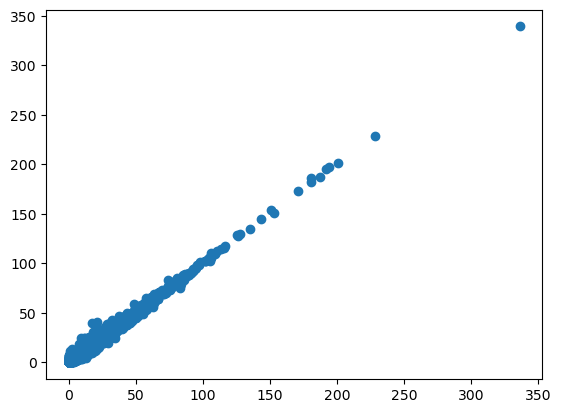

In [26]:
act_df['X_mean'] = act_df['X'].rolling(window=10, center=True).mean()
act_df['Y_mean'] = act_df['Y'].rolling(window=10, center=True).mean()
act_df['Z_mean'] = act_df['Z'].rolling(window=10, center=True).mean()
act_df['ODBA_man'] = np.abs(act_df['X'] - act_df['X_mean']) + np.abs(act_df['Y'] - act_df['Y_mean']) + np.abs(act_df['Z'] - act_df['Z_mean'])
#act_df[5:50]
plt.scatter(act_df['ODBA'],act_df['ODBA_man'])

In [35]:
n = 0

# Initialize empty lists instead of arrays
X_int = []
Y_int = []
Z_int = []
ODBA_int = []
VeDBA_int = []

# Extract the required columns from act_df and df to avoid repeated lookups
act_gmt_time = act_df['GMT Time']
df_gmt_time = df['GMT_Time']

# Iterate through the rows of act_df
for i in tqdm(act_df.index):
    # Check if the current act_df time is within the interval
    if act_gmt_time[i] <= df_gmt_time[n] + pd.Timedelta(minutes=5):
        # Append values to the lists
        X_int.append(act_df.loc[i, 'X'])
        Y_int.append(act_df.loc[i, 'Y'])
        Z_int.append(act_df.loc[i, 'Z'])
        ODBA_int.append(abs(act_df.loc[i, 'X']) + abs(act_df.loc[i, 'Y']) + abs(act_df.loc[i, 'Z']))
        VeDBA_int.append((act_df.loc[i, 'X']**2 + act_df.loc[i, 'Y']**2 + act_df.loc[i, 'Z']**2)**0.5)
    else:
        # Compute the statistics and assign them to the df DataFrame
        df.loc[n, 'X_mean'] = np.mean(X_int)
        df.loc[n, 'X_std'] = np.std(X_int)
        df.loc[n, 'Y_mean'] = np.mean(Y_int)
        df.loc[n, 'Y_std'] = np.std(Y_int)
        df.loc[n, 'Z_mean'] = np.mean(Z_int)
        df.loc[n, 'Z_std'] = np.std(Z_int)
        df.loc[n, 'ODBA_mean'] = np.mean(ODBA_int)
        df.loc[n, 'ODBA_std'] = np.std(ODBA_int)
        df.loc[n, 'VeDBA_mean'] = np.mean(VeDBA_int)
        df.loc[n, 'VeDBA_std'] = np.std(VeDBA_int)

        # Reset the lists for the next interval
        X_int = []
        Y_int = []
        Z_int = []
        ODBA_int = []
        VeDBA_int = []

        # Increment n to move to the next interval in df
        n += 1


100%|█████████▉| 191521/191729 [00:09<00:00, 19465.26it/s]


KeyError: 2866

In [36]:
df['GMT_Time'] = df['GMT_Time'].astype(str)
df['time'] = df['time'].astype(str)
df.head()
df.to_csv(r"../Data/GPS/2023/CSV/947_cl_R_fuzzyInput.csv")

In [67]:
a = [1,2,3]
b = [4,5,6]
a = np.array(a)
a = np.append(a,b)
a = np.insert(a,0,7)
a.mean()
a.std()

2.0